## Before you use this notebook..

#### FIRST - setup a Quandl account, and get an API token for youself
#### SECOND - create an environment variable titled `quandl.ApiConfig.api_key`; assign it the value of your Quandl API token
#### THIRD - in this folder, from the terminal activate your virtual environment and `pip install -r requirements.txt`
#### FOURTH - edit and run `retrieve_stock_history.py` to get datafiles 

### Setup jupyter notebook for analyis of stock portfolios 

In [1]:
import os
import pandas as pd
import prettypandas as PrettyPandas
import numpy as np
import tabulate

# import visualization libraries, and do some configuration of this jupyter notebook
import plotly
import bokeh
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# other visualization libraries
import seaborn
from bokeh.plotting import figure
from bokeh.plotting import output_file, output_notebook , show
from bokeh.io import show, output_notebook
from bokeh.io import export_png
from bokeh.models import ColumnDataSource, HoverTool, CategoricalColorMapper
from bokeh.palettes import Category10_5, Category20_16

# enable multiple outputs per cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Edit retrieve_stock_history.py  ---- put in stocks we want and our date range

### then, download data into the notebook

In [2]:
# here we read in the ticker symbols first, and convert to a list for later use
# in the csv we see that the first column is the old index and shows as `Unnamed: 0`; get rid of it
df_features = pd.read_csv("./data/quandl_test2_tickers.csv")
features = list(df_features.columns.values)
print("original feature list: \n", features, "\n")
features.remove('Unnamed: 0')
print("clean feature list: \n", features)

original feature list: 
 ['Unnamed: 0', 'Returns', 'Volatility', 'AAPL_Weight', 'AMZN_Weight', 'FB_Weight', 'GOOG_Weight', 'INTC_Weight', 'NVDA_Weight', 'TSLA_Weight'] 

clean feature list: 
 ['Returns', 'Volatility', 'AAPL_Weight', 'AMZN_Weight', 'FB_Weight', 'GOOG_Weight', 'INTC_Weight', 'NVDA_Weight', 'TSLA_Weight']


In [3]:
# read in the main stock data, and drop the old index which is seen as 'Unnamed: 0' in the csv. 
# hide the output of this big table with a semicolon after last command
df = pd.read_csv("./data/quandl_test2.csv",
    sep=r'\s*,\s*',
    engine='python',
    na_values="?")

df.drop(['Unnamed: 0'], axis=1);

In [4]:
df.head(5)

,Unnamed: 0,Returns,Volatility,AAPL_Weight,AMZN_Weight,FB_Weight,GOOG_Weight,INTC_Weight,NVDA_Weight,TSLA_Weight
0,0,0.383864,0.184852,0.278437,0.037240,0.153728,0.116656,0.203172,0.184399,0.026367
1,1,0.421205,0.189865,0.172117,0.203705,0.163496,0.179694,0.063528,0.191138,0.026321
2,2,0.427462,0.196499,0.015064,0.286520,0.292163,0.151929,0.033760,0.178674,0.041890
3,3,0.443241,0.198988,0.026559,0.230314,0.076166,0.160078,0.167487,0.218774,0.120622
4,4,0.331484,0.168635,0.293931,0.074841,0.021143,0.316951,0.172565,0.059868,0.060702


In [5]:
# summarize min and max for each stock
df_summary = []
df_summary.append(['variable name',
                   'range', 
                   'min', 
                   'max'])

for variable in features:
    df_summary.append([variable, 
                       round(abs(df[variable].min() - df[variable].max()),1), 
                       round(df[variable].min(),5), 
                       round(df[variable].max(),2)])


from tabulate import tabulate
print(tabulate(df_summary))

-------------  -----  -------  ----
variable name  range  min      max
Returns        0.3    0.24975  0.59
Volatility     0.1    0.16363  0.29
AAPL_Weight    0.6    0.0      0.58
AMZN_Weight    0.6    2e-05    0.57
FB_Weight      0.6    1e-05    0.59
GOOG_Weight    0.6    1e-05    0.58
INTC_Weight    0.5    0.0      0.53
NVDA_Weight    0.6    0.0      0.6
TSLA_Weight    0.6    0.0      0.61
-------------  -----  -------  ----


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000113FA362358>]],
      dtype=object)

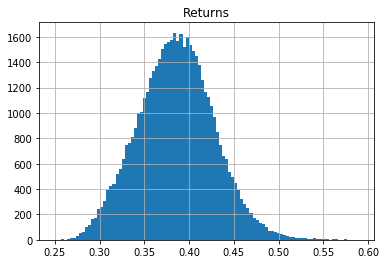

In [6]:
df.hist(column='Returns', bins=100)

### Interesting, but not so helpful - let's look at this graphically across all the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000113F9E51710>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000113FA71D748>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000113D6BDB240>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000113D6B36550>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000113D6AE0F60>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000113FB7730B8>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000113FA0235C0>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000113FA076AC8>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000113F9E5BFD0>]],
      dtype=object)

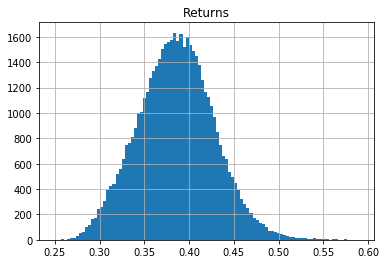

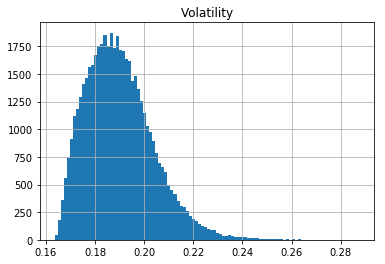

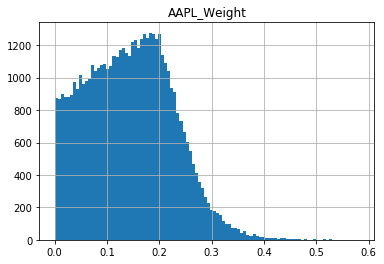

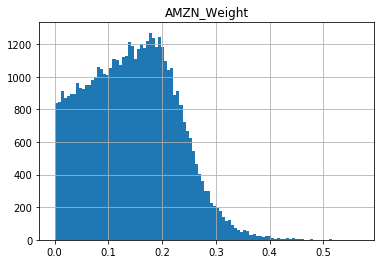

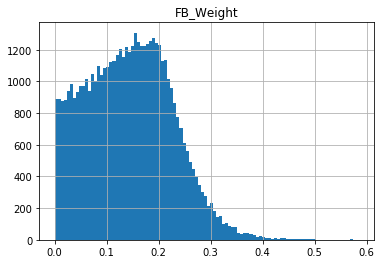

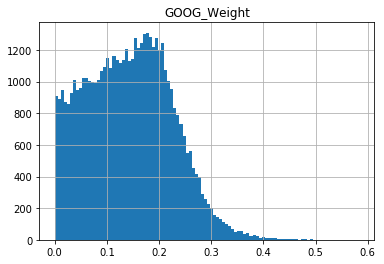

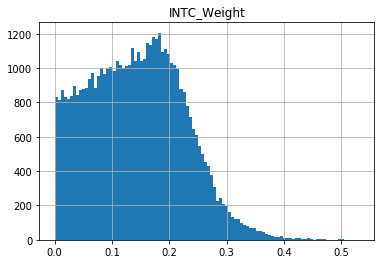

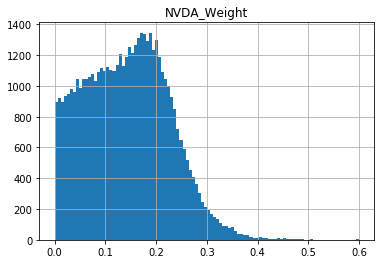

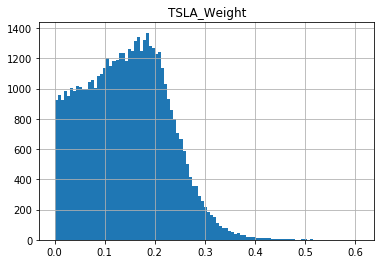

In [8]:
# to quickly get a sense of our data, let's create histograms for every feature in our datatable
for variable in features:
    df.hist(column=variable, bins=100);

### it will be more helpful to explore this in Surface Owl...
